# Session 20 Merging, Joining, and Concatenating

In [1]:
import pandas as pd
import numpy as np

In [2]:
courses_path = "data/courses.csv"
deliveries_path = "data/deliveries.csv"
matches_path = "data/matches.csv"
regM1_path = "data/reg-month1.csv"
regM2_path = "data/reg-month2.csv"
students_path = "data/students.csv"

courses = pd.read_csv(courses_path)
deliveries = pd.read_csv(deliveries_path)
matches = pd.read_csv(matches_path)
nov = pd.read_csv(regM1_path)
dec = pd.read_csv(regM2_path)
students = pd.read_csv(students_path)

## **Concatenation in Pandas (`pd.concat`)**

### **Definition**

The **`concat()`** method in pandas is used to **combine multiple DataFrames or Series** along a particular axis (either vertically — stacking rows, or horizontally — joining columns).

It’s one of the most common ways to merge datasets when they share similar structures.

---

### **How It Works**

`pd.concat()` performs **concatenation** by taking a list (or tuple) of DataFrames and joining them **either row-wise (`axis=0`)** or **column-wise (`axis=1`)**.

It **does not remove duplicates** or **align indexes automatically** — instead, it **retains the original indexes** of the concatenated DataFrames, which can sometimes lead to repeated or disordered index values.

> Note that any differences of either rows or columns while concatentating the dataframes will result in the empty values be filled by '**NaN**' by default.

---

### **Syntax**

```python
pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None)
```

---

### **Important Parameters**

| Parameter        | Description                                                                                    |
| ---------------- | ---------------------------------------------------------------------------------------------- |
| **objs**         | A sequence (list/tuple) of pandas objects (Series or DataFrames) to concatenate.               |
| **axis**         | Axis along which to concatenate. `0` → row-wise (default), `1` → column-wise.                  |
| **join**         | Determines how to handle indexes on other axis. `'outer'` (union) or `'inner'` (intersection). |
| **ignore_index** | If `True`, the original indexes are ignored and new integer indexes are assigned.              |
| **keys**         | Adds hierarchical keys (MultiIndex) to the result for distinguishing original datasets.        |

---

### **Example 1: Concatenating Row-wise (Default)**

```python
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

result = pd.concat([df1, df2])
print(result)
```

**Output:**

```
   A  B
0  1  3
1  2  4
0  5  7
1  6  8
```

Notice how the **index values (0, 1)** are **repeated**, because pandas **retains the original indexes** from both DataFrames.

---

### **Example 2: Resetting Index using `ignore_index=True`**

To avoid duplicate or confusing index values, we can reset the index:

```python
result = pd.concat([df1, df2], ignore_index=True)
print(result)
```

**Output:**

```
   A  B
0  1  3
1  2  4
2  5  7
3  6  8
```

Now, pandas has automatically re-assigned new index values (0 to 3).

---

### **Example 3: Concatenating Column-wise**

You can also concatenate **side by side** using `axis=1`.

```python
result = pd.concat([df1, df2], axis=1)
print(result)
```

**Output:**

```
   A  B  A  B
0  1  3  5  7
1  2  4  6  8
```

Here, both DataFrames are joined column-wise.

---

### **Use Cases**

* Combining data from multiple CSV files with the same structure.
* Merging model outputs or intermediate results during preprocessing.
* Creating larger datasets from split data chunks.

In [3]:
# here is an example of vertical concat on a local dataset
regs = pd.concat([nov, dec], ignore_index=True)
print(regs.shape[0])
regs

53


,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


As much as we have the choice of either retaining or removing the original indexing or the dataset, we can actually also introduce a **heirarchical index** using the `keys` attribute of the `concat()` method, and making it a **multi-index** DF. Here is how it's done:

In [4]:
multi = pd.concat([nov, dec], keys=['Nov', 'Dec'])
multi

student_id  course_id
Nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

### Fetching rows using `loc` or `iloc`
We can fetch the rows belonging to one of the heirarchical index as following. In the following output, are only the rows that belong to the **Nov** index.

In [5]:
multi.loc['Nov']

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


Similarly, we can also fetch **specific rows** of the heirarchical indices as follows:

In [6]:
# for fetching the 4th row of the rows belonging to the Dec index
multi.loc[('Dec', 4)]

student_id    14
course_id      9
Name: (Dec, 4), dtype: int64

### Horizontal concatenation

In [7]:
horz = pd.concat([nov, dec], axis=1)
print(horz.shape)
horz

(28, 4)


,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


## Pandas `append()`

The `append()` method in pandas is still available, but it has been **deprecated** and will be removed in future versions of pandas. The recommended way to combine DataFrames is now using the `concat()` method.

### Why the Change?

* The `append()` method was essentially a wrapper around `concat()`, but it wasn't as flexible or efficient for many use cases.
* `concat()` provides more control and better performance when combining multiple DataFrames, especially in loops or larger datasets.

### Example: Using `concat()` instead of `append()`

Here's how you would replace `append()` with `concat()`:

#### Using `append()` (deprecated)

```python
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

result = df1.append(df2, ignore_index=True)
print(result)
```

#### Using `concat()`

```python
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

result = pd.concat([df1, df2], ignore_index=True)
print(result)
```

### Key Differences:

* **`append()`** is limited to adding one DataFrame at a time.
* **`concat()`** allows combining multiple DataFrames at once and gives more flexibility, such as handling different axis (rows vs. columns), and can be used with a list of DataFrames.

So, while `append()` still works for now, we should start transitioning to `concat()` to future-proof the code.


## **Join Operations in Pandas**

### **Definition**

A **join** is a method of **combining two or more DataFrames** based on a **common column (or index)** that acts as a **key**.
This operation is conceptually similar to **SQL joins** and allows us to merge related data from different sources into a single, unified DataFrame.

---

### **How Joins Work**

In pandas, joins are performed using the **`merge()`** function.
It aligns the rows of two DataFrames based on the values in one or more **key columns** that exist in both DataFrames.

Essentially:

* You **match rows** between DataFrames based on common values in key columns.
* You can **choose how** unmatched rows should be handled using different join types.

---

### **Syntax**

```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None)
```

---

### **Key Parameters**

| Parameter             | Description                                                             |
| --------------------- | ----------------------------------------------------------------------- |
| **left, right**       | DataFrames to be joined.                                                |
| **how**               | Type of join to perform — `'inner'`, `'outer'`, `'left'`, or `'right'`. |
| **on**                | Column(s) to join on (must be common to both DataFrames).               |
| **left_on, right_on** | Used if the column names differ between DataFrames.                     |
| **suffixes**          | Tuple to add suffixes to overlapping column names.                      |

---

### **Types of Joins**

#### **1. Inner Join (Default)**

Returns only the **rows with matching keys** in both DataFrames.
Non-matching rows are **excluded**.

```python
pd.merge(df1, df2, how='inner', on='key')
```

✅ Keeps intersection of both tables.
❌ Drops unmatched rows.

---

#### **2. Outer Join**

Returns **all rows** from both DataFrames.
Rows without a match are filled with **NaN**.

```python
pd.merge(df1, df2, how='outer', on='key')
```

✅ Keeps union of all rows.
🟠 Missing matches get NaN values.

---

#### **3. Left Join**

Returns **all rows from the left DataFrame** and only **matching rows** from the right one.
Unmatched rows from the left DataFrame will have NaN for columns from the right.

```python
pd.merge(df1, df2, how='left', on='key')
```

✅ Preserves all left-side rows.
🟠 Fills unmatched right values with NaN.

---

#### **4. Right Join**

Returns **all rows from the right DataFrame** and only **matching rows** from the left one.
Unmatched left-side rows will have NaN for their columns.

```python
pd.merge(df1, df2, how='right', on='key')
```

✅ Preserves all right-side rows.
🟠 Fills unmatched left values with NaN.

---

### **Example**

```python
import pandas as pd

df1 = pd.DataFrame({'ID': [1, 2, 3, 4],
                    'Name': ['A', 'B', 'C', 'D']})

df2 = pd.DataFrame({'ID': [3, 4, 5, 6],
                    'Score': [85, 90, 88, 76]})
```

#### **Inner Join**

```python
pd.merge(df1, df2, how='inner', on='ID')
```

**Output:**

```
   ID Name  Score
0   3    C     85
1   4    D     90
```

#### **Outer Join**

```python
pd.merge(df1, df2, how='outer', on='ID')
```

**Output:**

```
   ID Name  Score
0   1    A    NaN
1   2    B    NaN
2   3    C   85.0
3   4    D   90.0
4   5  NaN   88.0
5   6  NaN   76.0
```

---

### **Summary**

| Join Type | Description               | Keeps unmatched rows? |
| --------- | ------------------------- | --------------------- |
| **Inner** | Keeps only matching keys  | ❌ No                  |
| **Outer** | Keeps all rows            | ✅ Both sides          |
| **Left**  | Keeps all rows from left  | ✅ Left only           |
| **Right** | Keeps all rows from right | ✅ Right only          |

---

### **Use Cases in Data Science**

* Combining customer info (left) with their transactions (right).
* Merging training data with labels.
* Integrating multiple data sources into one dataset before feature engineering or analysis.

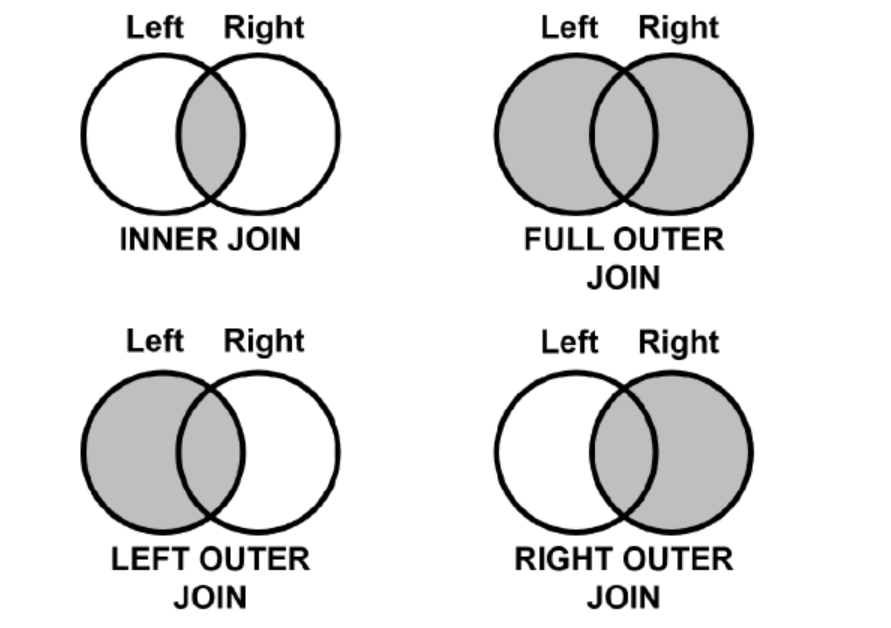

## Inner Join

In [8]:
# inner join
students.merge(regs, how='inner', on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


## Left Join

In [9]:
# left join
courses.merge(regs, how='left', on='course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


Now in the above code, the left table is the **courses** table, and the right one is **regs** table. By performing the left join, we select **all** the keys of the left side, but only those of the right side which are also common in the left side, and strike out the unique of the right side.

In [10]:
courses.merge(regs, how='left', on='course_id').tail(2)

,course_id,course_name,price,student_id
53,11,Numpy,699,NaN
54,12,C++,1299,NaN


Now, notice in the directly above code cell the **last 2 rows**. They include the courses `numpy` and `C++` since they were present in the left table. Though, they no `student_id`, since no student was actually enrolled in those courses.

## Right Join
For demonstrating the case of Right Join, we will create a hypothetical extension to the `students` table. The students introduced in this extension will **not be enrolled** in any of the courses.

In [11]:
# creating the hypothetical extension
temp_df = pd.DataFrame({
    'student_id': [26, 27, 28],
    'name': ['Nolan', 'Archimedes', 'Rapunzhel'],
    'partner': [28, 26, 17]
})
students = pd.concat([students, temp_df], ignore_index=True)

In [12]:
# displaying the extended df
students.tail()

,student_id,name,partner
23,24,Radhika Suri,17
24,25,Shashank D’Alia,2
25,26,Nolan,28
26,27,Archimedes,26
27,28,Rapunzhel,17


In [13]:
students.merge(regs, how='right', on='student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


Notice how the last 3 rows have printed the rest of the details, but now the details that were present only in the **left table**, i.e. the `student` table.

Whereas, on the contrary, if we perform left join at this point, keeping the student table on the left side, we will get the names and other information of the students, but not the courses they're enrolled in, because they weren't enrolled in any.
> Check out the last 3 rows of the following output for reference.

In [14]:
students.merge(regs, how='left', on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1.0
1,1,Kailash Harjo,23,6.0
2,1,Kailash Harjo,23,10.0
3,1,Kailash Harjo,23,9.0
4,2,Esha Butala,1,5.0
5,3,Parveen Bhalla,3,3.0
6,3,Parveen Bhalla,3,5.0
7,4,Marlo Dugal,14,NaN
8,5,Kusum Bahri,6,NaN
9,6,Lakshmi Contractor,10,NaN


## Outer Join
This type of join is simply the equivalent of `pd.concat()`, since it takes all the values of both the tables and **concatenates** them as the latter function does.

In [15]:
# outer join
students.merge(regs, how='outer', on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23.0,1.0
1,1,Kailash Harjo,23.0,6.0
2,1,Kailash Harjo,23.0,10.0
3,1,Kailash Harjo,23.0,9.0
4,2,Esha Butala,1.0,5.0
...,...,...,...,...
58,27,Archimedes,26.0,NaN
59,28,Rapunzhel,17.0,NaN
60,38,NaN,NaN,1.0
61,42,NaN,NaN,9.0


The last 6 rows of this resultant table will be of an interest, since they resemble both the characteristics of right as well as the left join.
> Check out the `name` and `course_id` columns of this table, both are the contrary of each other.

In [16]:
students.merge(regs, how='outer', on='student_id').tail(6)

,student_id,name,partner,course_id
57,26,Nolan,28.0,NaN
58,27,Archimedes,26.0,NaN
59,28,Rapunzhel,17.0,NaN
60,38,NaN,NaN,1.0
61,42,NaN,NaN,9.0
62,50,NaN,NaN,8.0


## Understanding by Tasks
Up ahead, we will be learning the concepts by solving some task questions.

### Task 1: Find total revenue generated by selling the courses.

In [30]:
total_rev = regs.merge(courses, how='inner', on='course_id')['price'].sum()
print(total_rev)

154247


As **inner join** is being performed, any `course_id` that does not exist in either one of the tables will not be considered in the resultant of the merge. *For example*, The price of courses **Numpy**, and **C++** are not considered in the merged table, as no student is actually enrolled in those courses, therefore the courses being disembarked.

### Task 2: Find the month by month revenue

In [36]:
nov_rev = nov.merge(courses, how='inner', on='course_id')['price'].sum()
print(nov_rev)

89175


In [37]:
dec_rev = dec.merge(courses, how='inner', on='course_id')['price'].sum()
print(dec_rev)

65072


Though the above method outputs the month-by-month revenue, it is not much of a feasible approach in case of multiple months. Here is a better approach for it.

In [55]:
pd.concat([nov, dec], keys=['nov', 'dec']).reset_index(names=['month', 'irrindex']).drop('irrindex', axis=1).merge(courses, how='inner', on='course_id').groupby(by='month')['price'].sum()

month
dec    65072
nov    89175
Name: price, dtype: int64

### Task 3: Print the registration table in the following format:
`cols -> name -> course -> price`

The main issue is that all of the above information that is required, is scattered along three different tables, i.e. regs, students, and courses.

> Hint: Perform multiple merges and merge the three tables.

In [58]:
regs.head(2), students.head(2), courses.head(2)

(   student_id  course_id
 0          23          1
 1          15          5,
    student_id           name  partner
 0           1  Kailash Harjo       23
 1           2    Esha Butala        1,
    course_id course_name  price
 0          1      python   2499
 1          2         sql   3499)

In [62]:
regs.merge(students, on='student_id').merge(courses, on='course_id')[['name', 'course_name', 'price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,tableau,2499
2,Fardeen Mahabir,power bi,1899
3,Chhavi Lachman,machine learning,9999
4,Elias Dodiya,plotly,699
5,Fardeen Mahabir,python,2499
6,Kailash Harjo,python,2499
7,Tarun Thaker,pandas,1099
8,Yash Sethi,data analysis,4999
9,Preet Sha,python,2499


### Task 4: Plot Bar Chart for revenue / course (revenue per course).

<Axes: xlabel='course_name'>

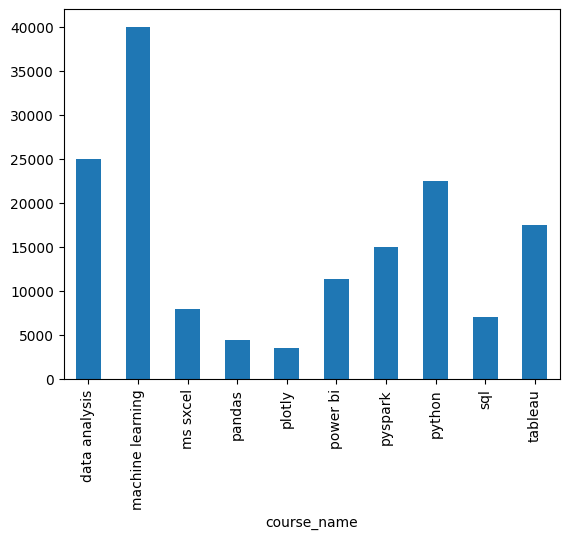

In [68]:
regs.merge(courses, how='inner', on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

### Task 5: Find the students who enrolled in both the months.

In [71]:
nov.columns

Index(['student_id', 'course_id'], dtype='object')

In [76]:
nov.merge(dec, on='student_id').merge(students, on='student_id')['name'].unique()

array(['Chhavi Lachman', 'Fardeen Mahabir', 'Elias Dodiya',
       'Kailash Harjo', 'Tarun Thaker', 'Yash Sethi',
       'David Mukhopadhyay', 'Yasmin Palan', 'Parveen Bhalla'],
      dtype=object)

In [81]:
# another strategy
common_students_id = np.intersect1d(nov['student_id'], dec['student_id'])
print(common_students_id)
print(students.student_id.isin(common_students_id))
students[students.student_id.isin(common_students_id)]

[ 1  3  7 11 16 17 18 22 23]
0      True
1     False
2      True
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15     True
16     True
17     True
18    False
19    False
20    False
21     True
22     True
23    False
24    False
25    False
26    False
27    False
Name: student_id, dtype: bool


,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


### Task 6: Find the courses in which no students enrolled.

In [ ]:
courses[~courses['course_id'].isin(regs['course_id'])]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


### Task 7: Find the students which did not enroll in any course.

In [87]:
students[~students.student_id.isin(regs.student_id)]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11
25,26,Nolan,28
26,27,Archimedes,26
27,28,Rapunzhel,17


In [89]:
students.head()

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6


### Task 8: Print `student_name -> partner_name` for all enrolled students.
This is an specific case where `merge()` has to be performed on the same table itself, and on the basis of distinct columns, one being the **student_id** column and the other being the **partner** column.

In [94]:
students.merge(students, how='inner', left_on='partner', right_on='student_id')[['name_x', 'name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


### Task 9: Find top 3 students who did the most enrollments.

In [107]:
top3_id = regs['student_id'].value_counts().head(3)
print(top3_id)
students.merge(top3_id, how='inner', on='student_id')[['student_id', 'name', 'count']].sort_values(by='count', ascending=False)

student_id
23    6
7     5
1     4
Name: count, dtype: int64


,student_id,name,count
2,23,Chhavi Lachman,6
1,7,Tarun Thaker,5
0,1,Kailash Harjo,4


Though our approach is correct, it may fail in case there are two students having the same name, and in such a case the only  distinction would be the `student_id` column.

Therefore, a better way would be to associate the `student_id` along with the `name` of the students.

In [120]:
regs.merge(students, on='student_id').groupby(['student_id', 'name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      6
7           Tarun Thaker        5
14          Pranab Natarajan    4
Name: name, dtype: int64

### Task 10: Find the top 3 students who spent the most amount of money on courses.

In [148]:
regs.merge(students, on='student_id').groupby(['course_id', 'student_id']).sum().reset_index().merge(courses, on='course_id').groupby(['student_id'])['price'].sum().reset_index().merge(students, on='student_id').sort_values(by='price', ascending=False)[['student_id', 'name', 'price']].head(3)

,student_id,name,price
15,23,Chhavi Lachman,22594
7,14,Pranab Natarajan,15096
12,19,Qabeel Raman,13498


Or below is an even simple approach.

In [154]:
regs.merge(students, on='student_id').merge(courses, on='course_id').groupby(['student_id', 'name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

## Demonstration on IPL Deliveries Dataset

### Find top 3 Stadiums with the highest number of sixes per matche ratio.

In [163]:
temp_df = deliveries.merge(matches, left_on='match_id', right_on='id')
temp_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [166]:
six_df = temp_df[temp_df['batsman_runs'] == 6]
six_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [169]:
# stadium -> sixes
num_sixes = six_df.groupby('venue')['venue'].count()
num_sixes

venue
Barabati Stadium                                         68
Brabourne Stadium                                       114
Buffalo Park                                             27
De Beers Diamond Oval                                    34
Dr DY Patil Sports Academy                              173
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     129
Dubai International Cricket Stadium                      58
Eden Gardens                                            594
Feroz Shah Kotla                                        636
Green Park                                               36
Himachal Pradesh Cricket Association Stadium            108
Holkar Cricket Stadium                                   88
JSCA International Stadium Complex                       76
Kingsmead                                               130
M Chinnaswamy Stadium                                   873
MA Chidambaram Stadium, Chepauk                         507
Maharashtra Cricket Association St

In [171]:
num_matches = matches['venue'].value_counts()
num_matches

venue
M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadiu

In [174]:
(num_sixes / num_matches).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64